# Improving Data Visualizations in Python
## Highlighting data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pollution = pd.read_csv('pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


### Hardcoding a highlight

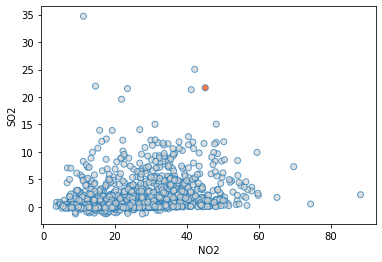

In [3]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2', y = 'SO2', data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

### Programmatically creating a highlight

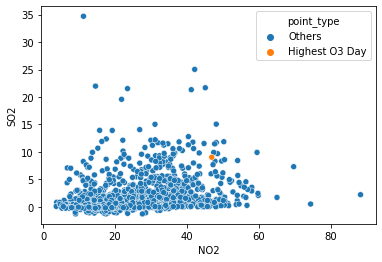

In [4]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Highest observed O3 value in houston
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  == max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

## Comparing groups
### Comparing with two KDEs

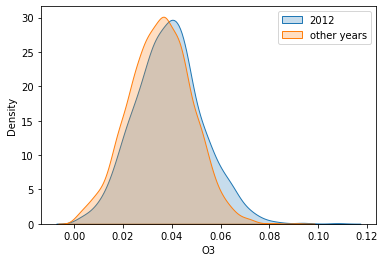

In [5]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.legend()
plt.show()

> We can see that 2012 had slightly higher than typical O3 levels, which may explain the filter sales. However, keen observers will note that some of our cities don't have full data for 2012, which could skew the trends.

### Improving your KDEs

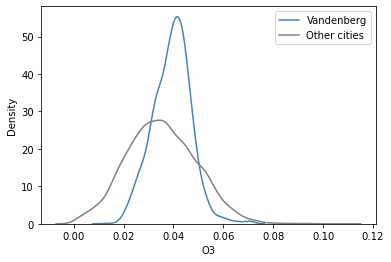

In [6]:
sns.kdeplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn off the histogram and color blue to stand out
             color = 'steelblue')

sns.kdeplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray  
             color = 'gray')
plt.legend()
plt.show()

>  The rug plot shows that there is a small, but not neglible gap, in the data around O3 = 0.065.

### Beeswarms


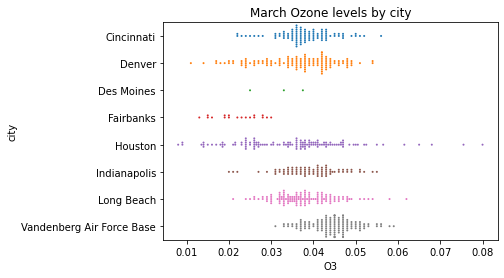

In [7]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 2)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

> Vandenberg on average has high O3 levels in March. However, Houston has a much wider range and can sometimes reach much higher levels.

## Annotations
### Basic text annotation

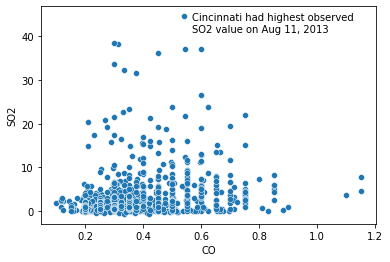

In [8]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'medium'})
plt.show()

### Arrow annotations

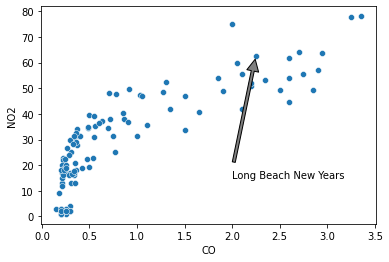

In [9]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears['CO'], lb_newyears['NO2']),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

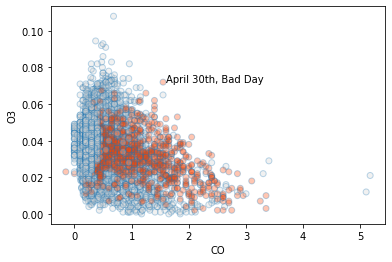

In [10]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

## Using color in visualizations

<AxesSubplot:xlabel='CO', ylabel='NO2'>

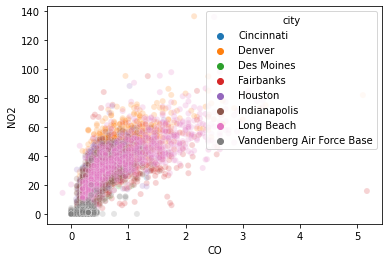

In [11]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot(x = 'CO', y = 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)

> It's hard to make out differences between the cities because one has to differentiate between similar colors.

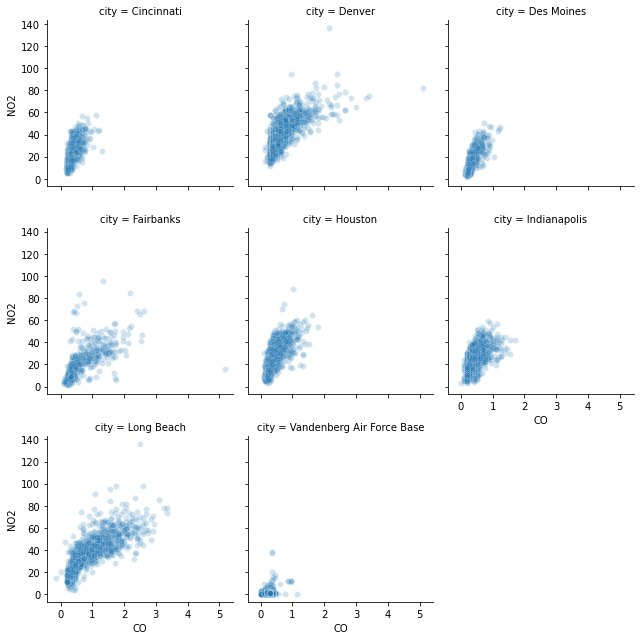

In [12]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

> This new faceted plot removes the pretty colors but becomes a whole lot more informative. 

### Fixing Seaborn's bar charts

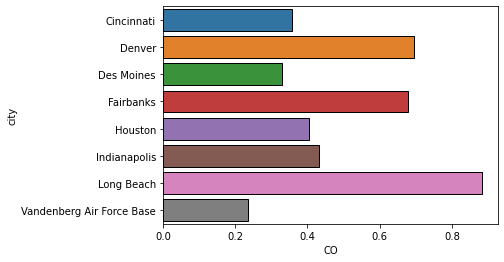

In [13]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            edgecolor = 'black')
plt.show()

> Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception.

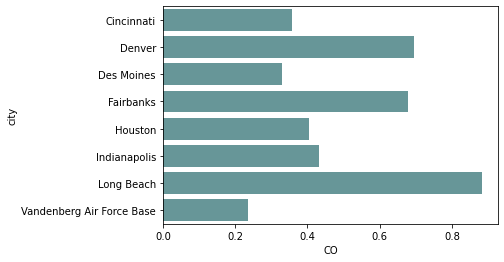

In [14]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            # Replace border with bar colors
            color = 'cadetblue')
plt.show()

> Much better
## Continuous color palettes
### Making a custom continuous palette

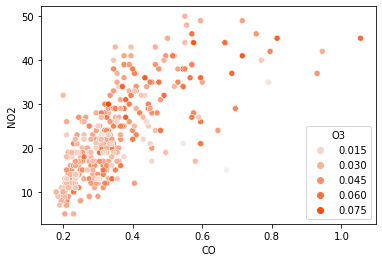

In [15]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered', as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

> Added a large amount of information while still maintaining high precision in your main goal of comparing the CO and NO2 values to each other.
### Customizing a diverging palette heatmap

In [16]:
nov_2015 = pollution.query("year  ==  2015 & month  ==  11")

In [17]:
nov_2015_CO = nov_2015.pivot_table(index='city', columns='day', values='CO', aggfunc='mean')
nov_2015_CO.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
nov_2015_CO.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
city,,,,,,,,,,,,,,,,,,,,,
Cincinnati,NaN,NaN,NaN,NaN,NaN,0.302,0.3340,0.4490,0.4725,0.7575,...,0.4270,0.5455,0.821,0.8905,0.6165,0.2985,0.2885,0.3365,0.2140,0.4005
Denver,0.650,1.100,0.5500,0.6500,0.550,0.600,1.0000,1.0000,1.0000,1.5000,...,0.5500,0.8000,1.550,1.1500,1.0500,0.3500,0.3500,0.4000,0.4500,0.5500
Fairbanks,0.570,0.470,1.0800,0.8150,0.760,0.430,0.7100,0.4850,0.7150,1.2550,...,NaN,NaN,NaN,0.4350,1.1000,0.5950,1.1050,0.9800,1.8450,1.6900
Houston,0.366,0.673,0.5215,0.4325,0.245,0.375,0.2205,0.2305,0.5605,0.7190,...,0.3015,0.8680,0.758,0.5960,0.2215,0.1940,0.2095,0.2830,0.2525,0.4355
Indianapolis,0.950,1.200,1.7000,1.1000,0.350,0.250,0.3500,0.7500,0.7000,0.7000,...,0.4000,0.3500,0.350,1.2500,0.4000,0.2500,0.2500,0.2000,0.2000,0.3500


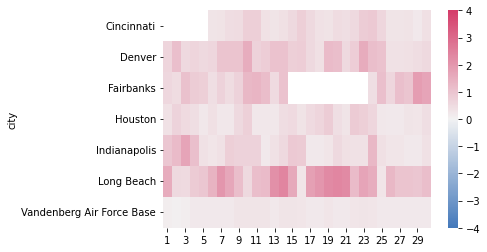

In [18]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

### Adjusting your palette according to context

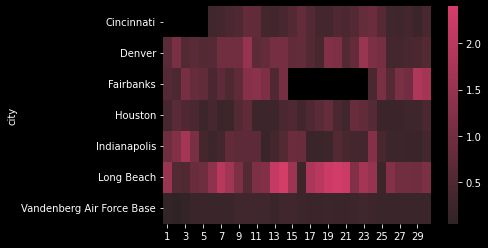

In [19]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

## Categorical palettes
### Using a custom categorical palette

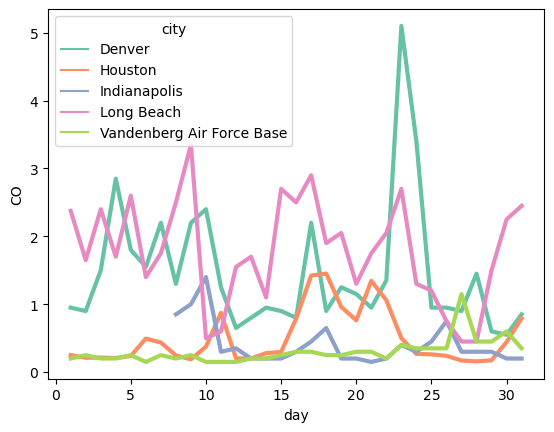

In [20]:
plt.style.use('default')
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

> The large spike around 23 days belongs to Denver.
### Dealing with too many categories

In [21]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base', 'Long Beach', 'Cincinnati']

# Assign a new column to DataFrame for isolating the desired combos
pollution['color_cats'] = [x if x in wanted_combos else 'other' for x in pollution['city']]
pollution.color_cats.value_counts()

other                        5285
Vandenberg Air Force Base    1425
Long Beach                   1193
Cincinnati                    985
Name: color_cats, dtype: int64

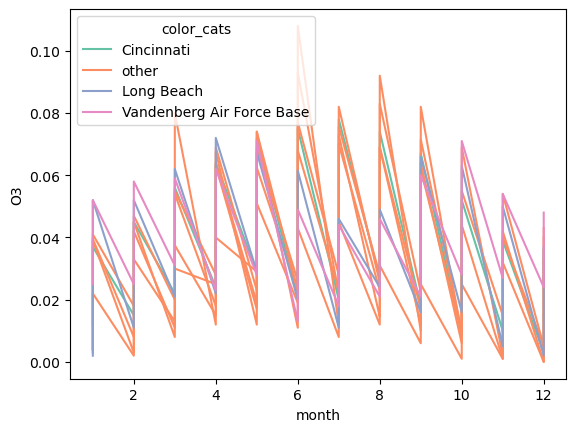

In [22]:
# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "O3",
             hue = 'color_cats',
             units = 'city',
             estimator = None,
             palette = 'Set2',
             data = pollution)
plt.show()

### Coloring ordinal categories

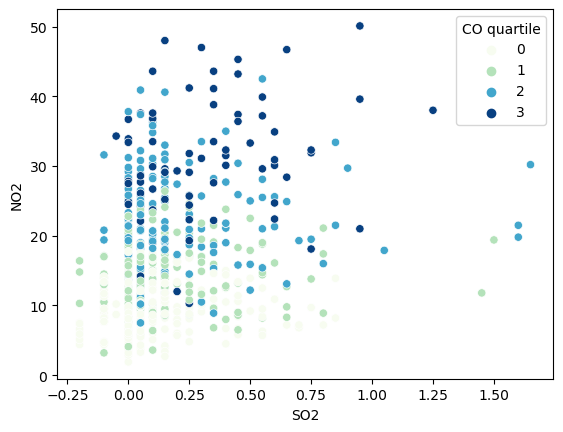

In [23]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                palette = 'GnBu')
plt.show()

### Choosing the right variable to encode with color

In [24]:
max_pollutant_values = pollution.groupby(['city', 'year','month','day'])['CO', 'NO2', 'O3'].mean().reset_index()
max_pollutant_values.head()

/var/folders/4n/dll6nv094h5fm4m2lhzkmtd40000gn/T/ipykernel_45643/1088203703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_pollutant_values = pollution.groupby(['city', 'year','month','day'])['CO', 'NO2', 'O3'].mean().reset_index()


,city,year,month,day,CO,NO2,O3
0,Cincinnati,2012,1,1,0.245,20.0,0.030
1,Cincinnati,2012,1,2,0.185,9.0,0.025
2,Cincinnati,2012,1,3,0.335,31.0,0.025
3,Cincinnati,2012,1,4,0.305,25.0,0.016
4,Cincinnati,2012,1,5,0.345,21.0,0.016


In [25]:
max_pollutant_values = max_pollutant_values.melt(id_vars=['city', 'year', 'month', 'day'], 
                                  value_vars=['CO', 'NO2', 'O3'], 
                                  var_name='pollutant', 
                                  value_name='max')

In [26]:
max_pollutant_values.pollutant.value_counts()

CO     8888
NO2    8888
O3     8888
Name: pollutant, dtype: int64

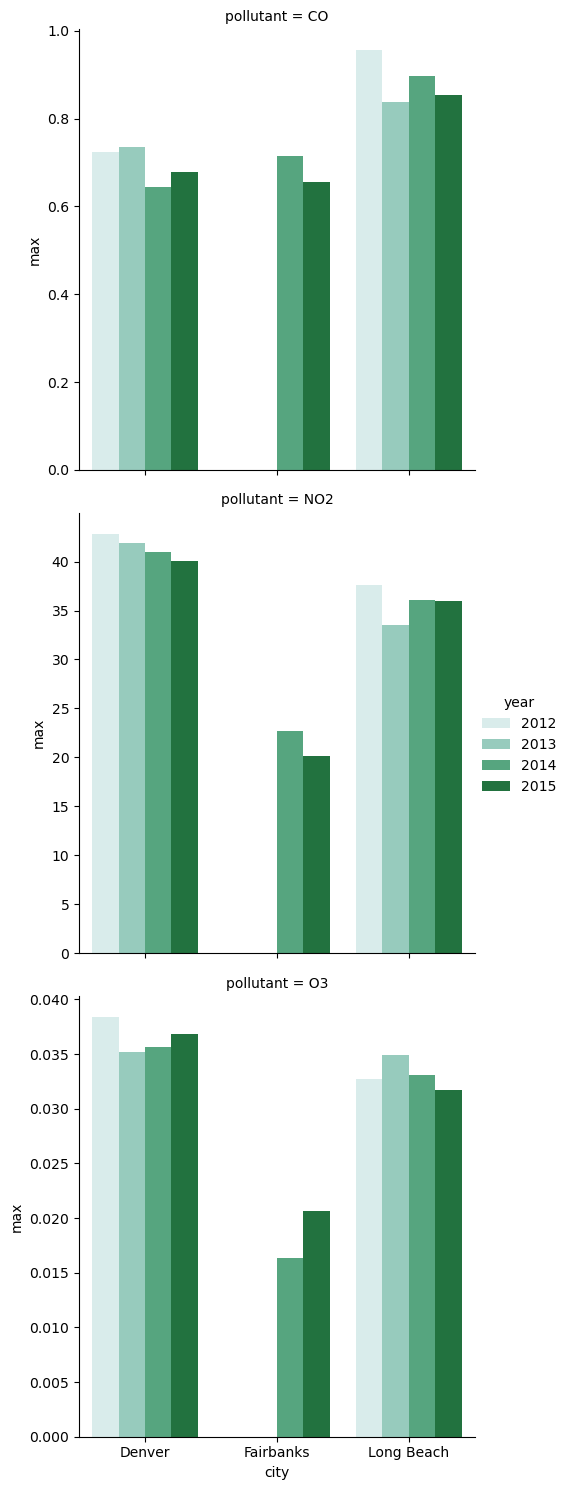

In [27]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'max', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar', ci=None)
plt.show()

## Showing uncertainty
### Point estimate intervals
### Basic confidence intervals

In [28]:
average = {'pollutant': {0: 'CO', 1: 'NO2', 2: 'O3', 3: 'SO2'},
 'mean': {0: 0.3519107142857143,
  1: 19.021428571428572,
  2: 0.04398214285714285,
  3: 0.20714285714285713},
 'std_err': {0: 0.03356285085678568,
  1: 2.2005180115033,
  2: 0.0018218630684240416,
  3: 0.03751821714948355},
 'y': {0: '95% Interval',
  1: '95% Interval',
  2: '95% Interval',
  3: '95% Interval'},
 'seen': {0: 0.4, 1: 16.0, 2: 0.05, 3: 0.15}}
average_ests = pd.DataFrame(average)
average_ests

,pollutant,mean,std_err,y,seen
0,CO,0.351911,0.033563,95% Interval,0.40
1,NO2,19.021429,2.200518,95% Interval,16.00
2,O3,0.043982,0.001822,95% Interval,0.05
3,SO2,0.207143,0.037518,95% Interval,0.15


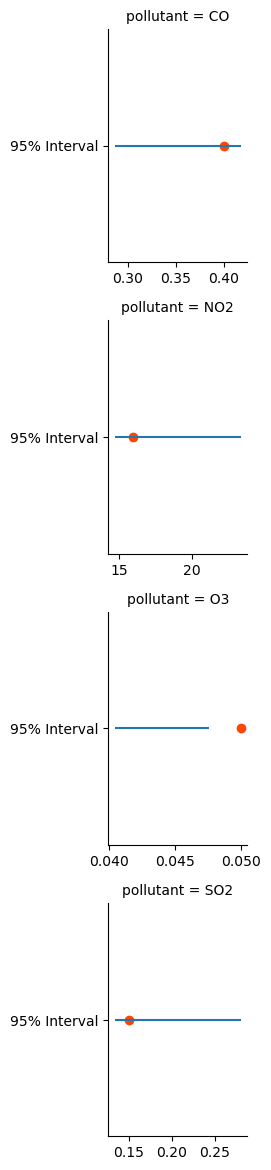

In [29]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

> All the observed values fall well within the confidence intervals for all the pollutants except for O3.

### Annotating confidence intervals

In [30]:
diffs_by_year = pd.DataFrame({'year': {0: 2013, 1: 2014, 2: 2015},
 'mean': {0: 0.8408196721311477,
  1: -1.337624584717608,
  2: -0.6493273542600896},
 'std_err': {0: 0.8701349677383201,
  1: 0.7615411467017833,
  2: 0.6181746079766589},
 'lower': {0: -0.8646448646359596,
  1: -2.8302452322531035,
  2: -1.8609495858943412},
 'upper': {0: 2.546284208898255, 1: 0.15499606281788725, 2: 0.562294877374162}})
diffs_by_year

,year,mean,std_err,lower,upper
0,2013,0.840820,0.870135,-0.864645,2.546284
1,2014,-1.337625,0.761541,-2.830245,0.154996
2,2015,-0.649327,0.618175,-1.860950,0.562295


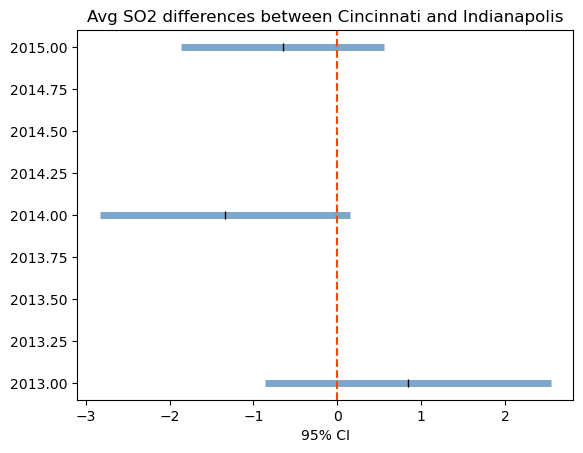

In [31]:
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

> The difference flipped from generally positive (more pollution in Cincinnati) in 2013 to negative (more pollution in Indianapolis) in 2014 and 2015. 

## Confidence bands
### Making a confidence band

In [32]:
vandenberg_NO2 = pollution.query("city == 'Vandenberg Air Force Base'")
vandenberg_NO2 = vandenberg_NO2[['NO2', 'day']]
vandenberg_NO2['ma_NO2'] = vandenberg_NO2['NO2'].rolling(window=25).mean()
vandenberg_NO2['std_err'] = vandenberg_NO2['NO2'].rolling(window=25).std()
vandenberg_NO2 = vandenberg_NO2.groupby('day')[['ma_NO2']].agg({'mean','std'})
vandenberg_NO2.reset_index(inplace=True)
vandenberg_NO2.columns = ['day', 'mean', 'std_err']
vandenberg_NO2.head()

,day,mean,std_err
0,1,1.933333,0.467047
1,2,1.920000,0.491528
2,3,2.013333,0.614925
3,4,2.013333,0.614925
4,5,2.040000,0.589237


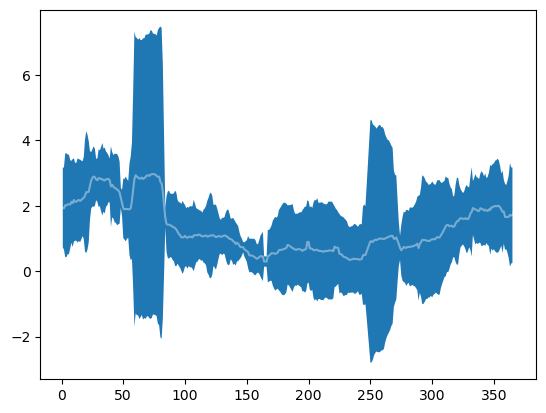

In [33]:
# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

### Separating a lot of bands

In [34]:
eastern_SO2 = pollution.query("city == 'Cincinnati' | city == 'Des Moines' | city == 'Houston' | city == 'Indianapolis'")
eastern_SO2.city.value_counts()

Houston         1433
Indianapolis    1137
Cincinnati       985
Des Moines       832
Name: city, dtype: int64

In [35]:
eastern_SO2 = eastern_SO2.groupby(['city','day'], as_index=False)['SO2'].agg({'mean','std'})
eastern_SO2.reset_index(inplace=True)
eastern_SO2['lower'] = eastern_SO2['mean'] - 2.58*eastern_SO2['std']
eastern_SO2['upper'] = eastern_SO2['mean'] + 2.58*eastern_SO2['std']

In [36]:
eastern_SO2.head()

,city,day,mean,std,lower,upper
0,Cincinnati,1,5.166667,2.168141,-0.427136,10.760469
1,Cincinnati,2,4.750000,2.262742,-1.087874,10.587874
2,Cincinnati,3,2.400000,2.616295,-4.350041,9.150041
3,Cincinnati,4,10.650000,9.192388,-13.066361,34.366361
4,Cincinnati,5,13.475000,3.429468,4.626973,22.323027


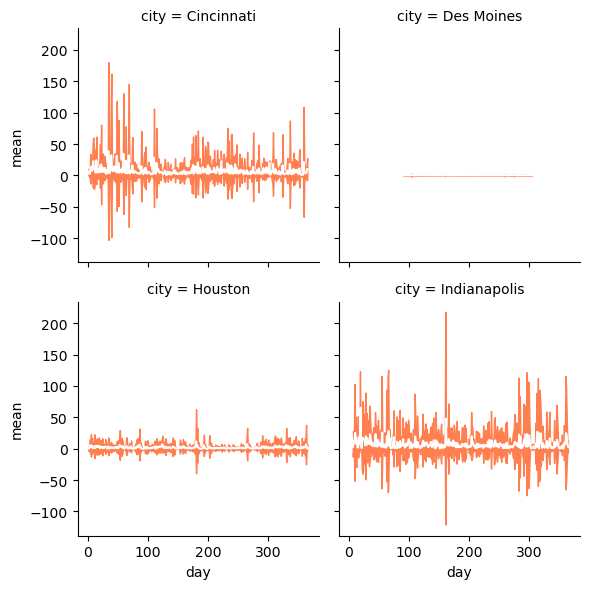

In [37]:
# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

### Cleaning up bands for overlaps

In [38]:
SO2_compare = pollution.query("city == 'Denver' | city == 'Long Beach'")
SO2_compare.city.value_counts()

Denver        1389
Long Beach    1193
Name: city, dtype: int64

In [39]:
SO2_compare = SO2_compare.groupby(['city','day'], as_index=False)['SO2'].agg({'mean','std'})
SO2_compare.reset_index(inplace=True)
SO2_compare['lower'] = SO2_compare['mean'] - 2.58*SO2_compare['std']
SO2_compare['upper'] = SO2_compare['mean'] + 2.58*SO2_compare['std']

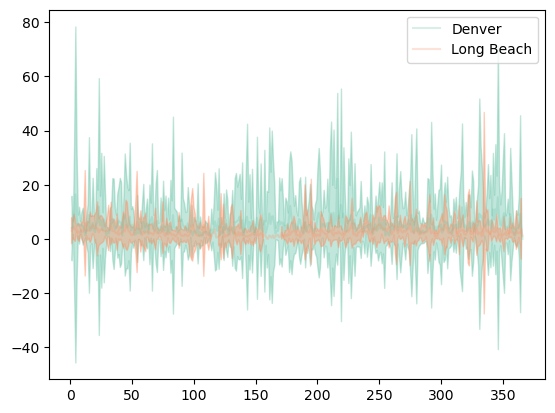

In [40]:
for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = color, alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = color, alpha = 0.25)

plt.legend()
plt.show()

## Beyond 95%
### 90 and 95% bands

In [41]:
cinci_13_no2 = pollution.query("city == 'Cincinnati' & year == 2013")
cinci_13_no2 = cinci_13_no2[['NO2', 'day']]
cinci_13_no2['ma_NO2'] = cinci_13_no2['NO2'].rolling(window=25).mean()
cinci_13_no2['std_err'] = cinci_13_no2['NO2'].rolling(window=25).std()
cinci_13_no2 = cinci_13_no2[['day', 'ma_NO2', 'std_err']]

In [42]:
cinci_13_no2.dropna(subset=['ma_NO2','std_err'], inplace=True)
cinci_13_no2.head()

,day,ma_NO2,std_err
82,67,24.88,8.303212
83,68,24.60,8.062258
84,69,24.24,8.287943
85,70,24.28,8.274056
86,71,23.68,8.081460


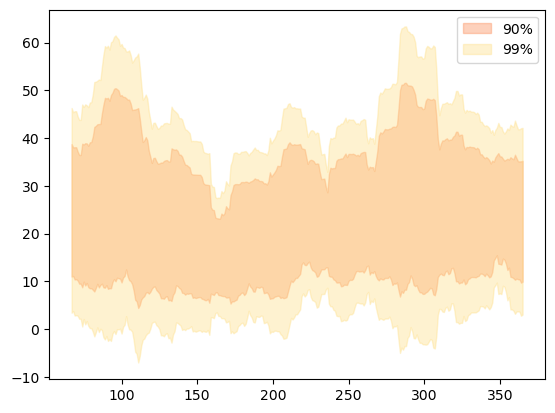

In [43]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['ma_NO2'] - Z * cinci_13_no2['std_err'],
        y2 = cinci_13_no2['ma_NO2'] + Z * cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

### Using band thickness instead of coloring

In [44]:
rocket = {'pollutant': {0: 'SO2', 1: 'NO2', 2: 'CO', 3: 'O3'},
 'est': {0: 0.13818519, 1: 0.32012064, 2: 0.0842821, 3: 0.56536813},
 'std_err': {0: 0.03465057, 1: 0.04984866, 2: 0.0247576, 3: 0.02219086}}

rocket_model = pd.DataFrame(rocket)

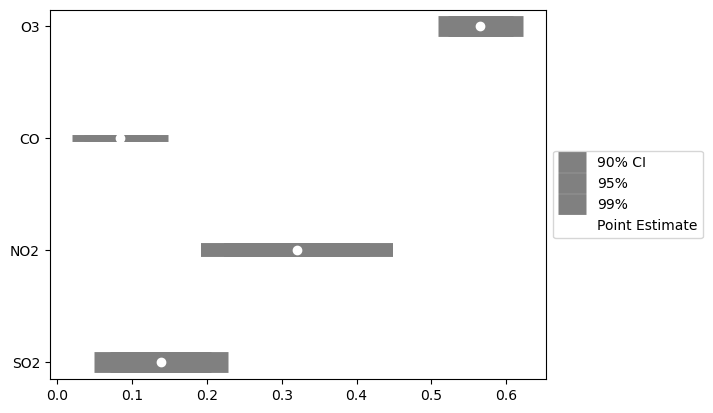

In [45]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = sizes, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## Visualizing the bootstrap
### The bootstrap histogram

In [46]:
import numpy as np
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data, len(data))) for _ in range(n_boots)]

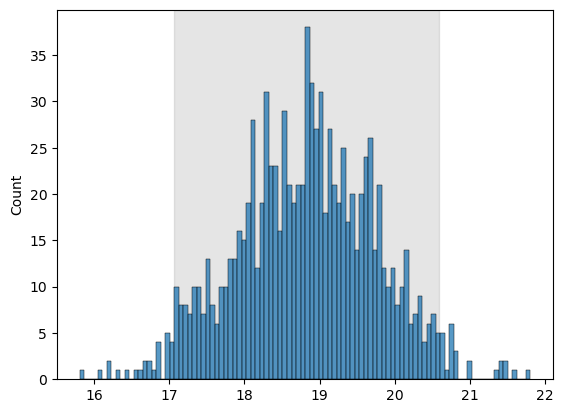

In [47]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.histplot(boot_means, bins = 100, kde = False)

plt.show()


### Bootstrapped regressions

In [48]:
no2_so2 = pollution[['NO2','SO2']].sample(62)
no2_so2_boot = pd.concat([no2_so2.sample(n=len(no2_so2), replace=True).assign(sample=i) for i in range(100)])
no2_so2_boot.head()

,NO2,SO2,sample
2952,15.3,0.35,0
4904,27.1,5.30,0
5776,28.5,7.10,0
5695,10.0,9.85,0
6432,23.2,4.35,0


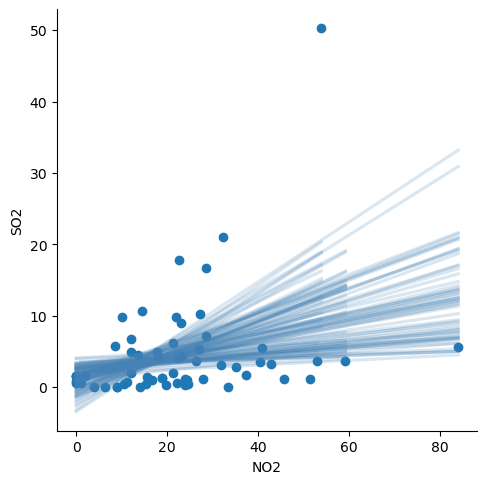

In [49]:
sns.lmplot(x='NO2', y='SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter(x='NO2', y='SO2', data = no2_so2)

plt.show()

### Lots of bootstraps with beeswarms

In [50]:
pollution_may = pollution.query("month == 5")
pollution_may.head()

,city,year,month,day,CO,NO2,O3,SO2,color_cats,CO quartile
136,Cincinnati,2013,5,121,0.640,33.0,0.055,1.85,Cincinnati,3
137,Cincinnati,2013,5,122,0.315,23.0,0.043,4.10,Cincinnati,1
138,Cincinnati,2013,5,123,0.260,13.0,0.039,4.75,Cincinnati,1
139,Cincinnati,2013,5,124,0.245,17.0,0.051,4.45,Cincinnati,0
140,Cincinnati,2013,5,125,0.230,12.0,0.032,0.85,Cincinnati,0


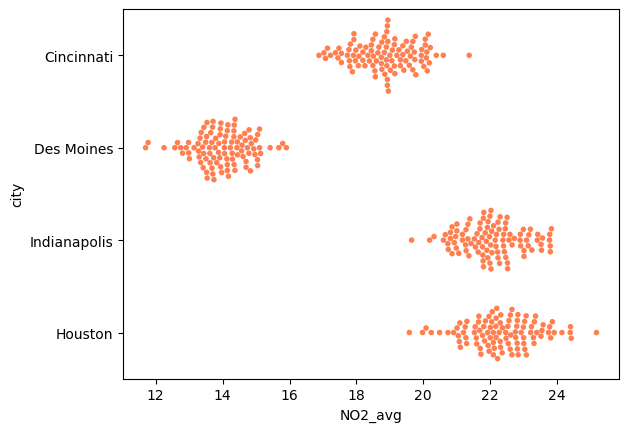

In [51]:
# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral', size=4)

plt.show()

# Visualization in the data science workflow
## First explorations
### Looking at the farmers market data

In [52]:
markets = pd.read_csv('markets_cleaned.csv')
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [53]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
first_rows

,0,1,2
FMID,1018261,1018318,1009364
name,Caledonia Farmers Market Association - Danville,Stearns Homestead Farmers' Market,106 S. Main Street Farmers Market
city,Danville,Parma,Six Mile
county,Caledonia,Cuyahoga,NaN
state,Vermont,Ohio,South Carolina
lat,-72.140337,-81.733939,-82.8187
lon,44.411036,41.374801,34.8042
months_open,3.0,4.0,NaN
Bakedgoods,1,1,0
Beans,1,0,0


In [54]:
# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                percentiles = [0.5]).transpose()
col_descriptions

,count,unique,top,freq,mean,std,min,50%,max
FMID,8739.0,NaN,NaN,NaN,1010671.159172,55328.045559,1000001.0,1006895.0,2000036.0
name,8739,8158,El Mercado Familiar,33,NaN,NaN,NaN,NaN,NaN
city,8699,4697,Chicago,62,NaN,NaN,NaN,NaN,NaN
county,8228,1503,Los Angeles,121,NaN,NaN,NaN,NaN,NaN
state,8739,53,California,760,NaN,NaN,NaN,NaN,NaN
lat,8710.0,NaN,NaN,NaN,-90.925689,17.366333,-166.54,-86.249268,-64.7043
lon,8710.0,NaN,NaN,NaN,39.133725,5.286239,17.7099,40.017753,64.86275
months_open,5452.0,NaN,NaN,NaN,6.456346,2.743168,1.0,6.0,12.0
Bakedgoods,8739.0,NaN,NaN,NaN,0.592516,0.491394,0.0,1.0,1.0
Beans,8739.0,NaN,NaN,NaN,0.098638,0.298193,0.0,0.0,1.0


### Scatter matrix of numeric columns

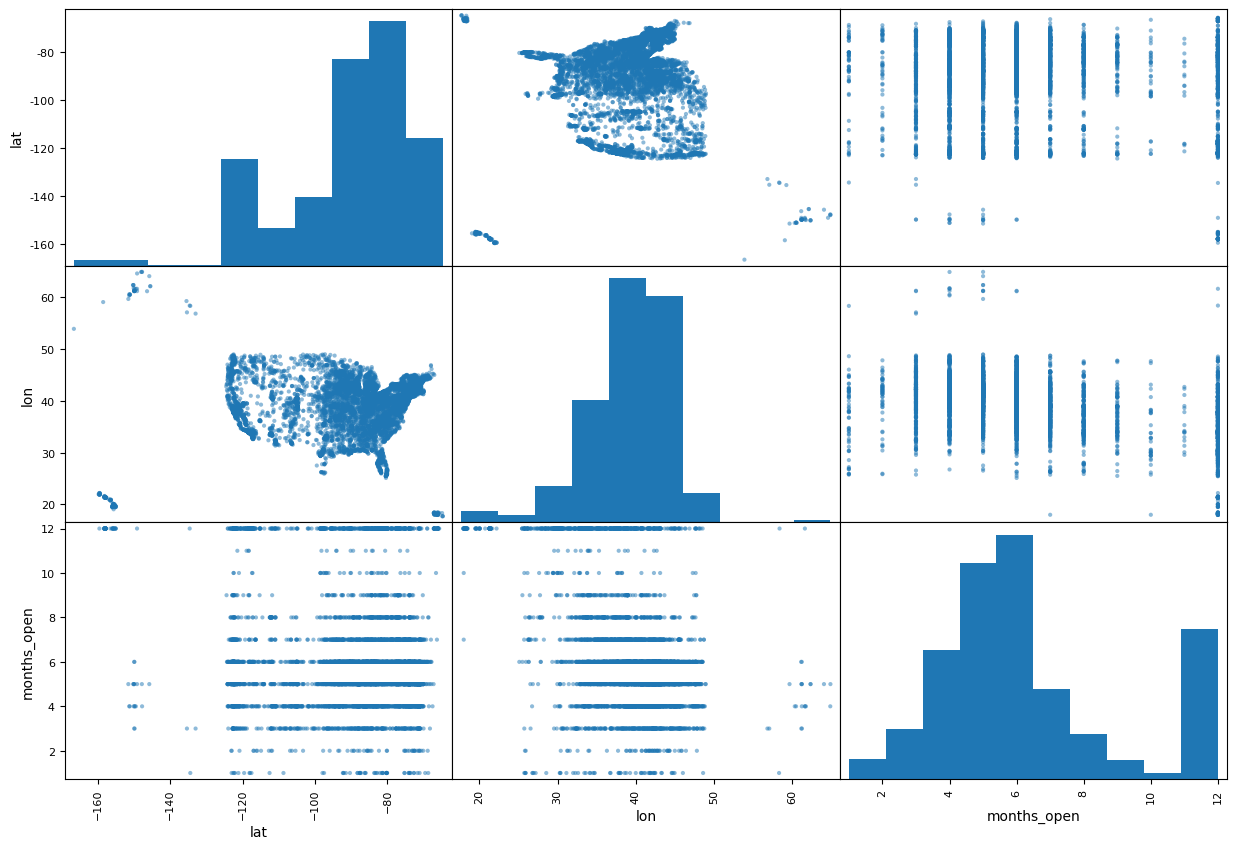

In [55]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = [15,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

### Digging in with basic transforms

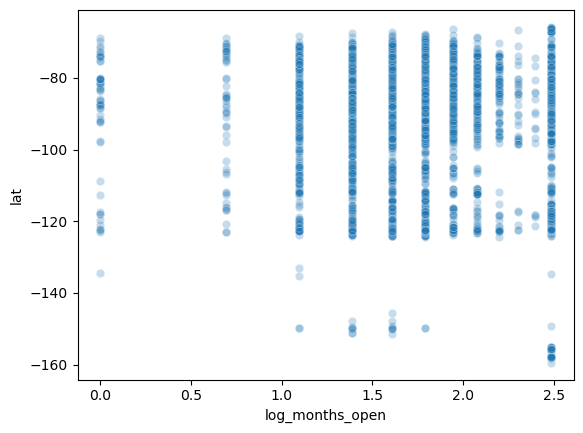

In [57]:
# Create a new logged population column 
markets['log_months_open'] = np.log(markets['months_open'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_months_open', 
                  y = 'lat', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)

plt.show()

## Exploring the patterns
### Is latitude related to months open?

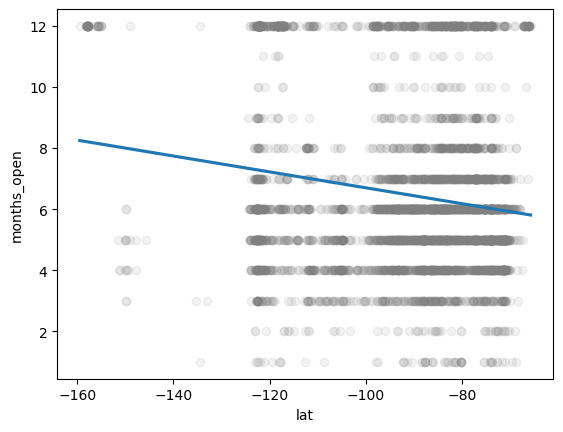

In [58]:
sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

plt.show()

> There is a negative relationship between a market's latitude and the number of months it's open. 

### What state is the most market-friendly?

In [64]:
markets_and_pop = pd.read_csv('markets_and_pop.csv', index_col=0)
markets_and_pop.head()

,state,num_markets,state_pop,log_markets,log_pop
0,Alabama,71,4849377.0,4.262680,15.394361
1,Arizona,66,6731484.0,4.189655,15.722306
2,Arkansas,59,2966369.0,4.077537,14.902849
3,California,442,38802500.0,6.091310,17.473995
4,Colorado,98,5355866.0,4.584967,15.493703


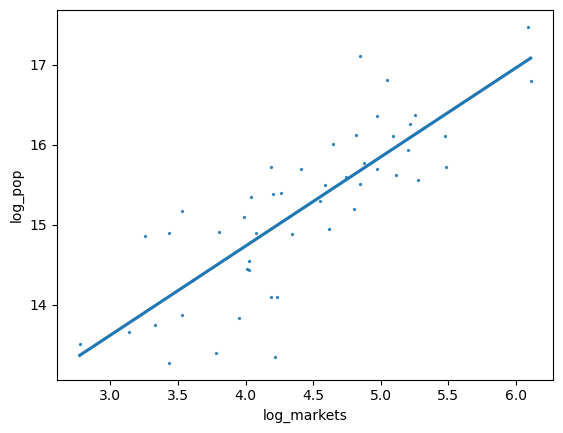

In [66]:
g = sns.regplot(
    x = "log_markets", y = "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, _, _, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (_,_), size = 10)

plt.show()

> Vermont and Texas seem to be the largest outliers. With Vermont falling the furthest below the best-fit line and Texas the furthest above. 

In [76]:
goods = ['Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine']

In [82]:
goods_by_state = markets.melt(id_vars=['state'], value_vars=goods, var_name='good')
goods_by_state = goods_by_state.groupby(['state', 'good'], as_index=False)['value'].value_counts(normalize=True)

In [86]:
goods_by_state = goods_by_state.rename(columns = {'proportion':'prop_selling'})
goods_by_state.head()

,state,good,value,prop_selling
0,Alabama,Bakedgoods,0,0.557143
1,Alabama,Bakedgoods,1,0.442857
2,Alabama,Beans,0,0.957143
3,Alabama,Beans,1,0.042857
4,Alabama,Cheese,0,0.878571


### Popularity of goods sold by state

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


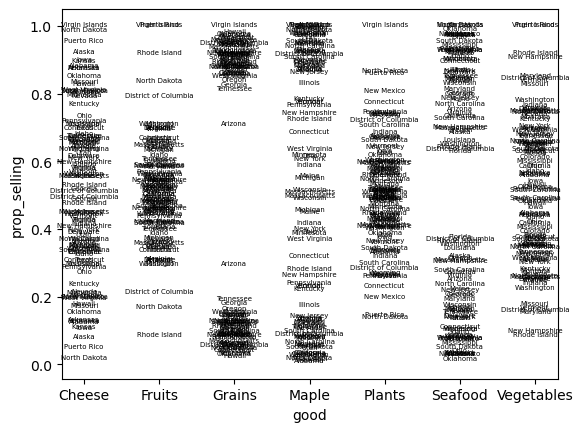

In [89]:
# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 5)

plt.show()

> While this plot may be very messy but also very interesting. You can see specific states rise above the rest, such as Arizona with grains, and other states like New Mexico consistently lag behind others in the availability of goods. 

## Making your visualizations efficient
### Stacking to find trends

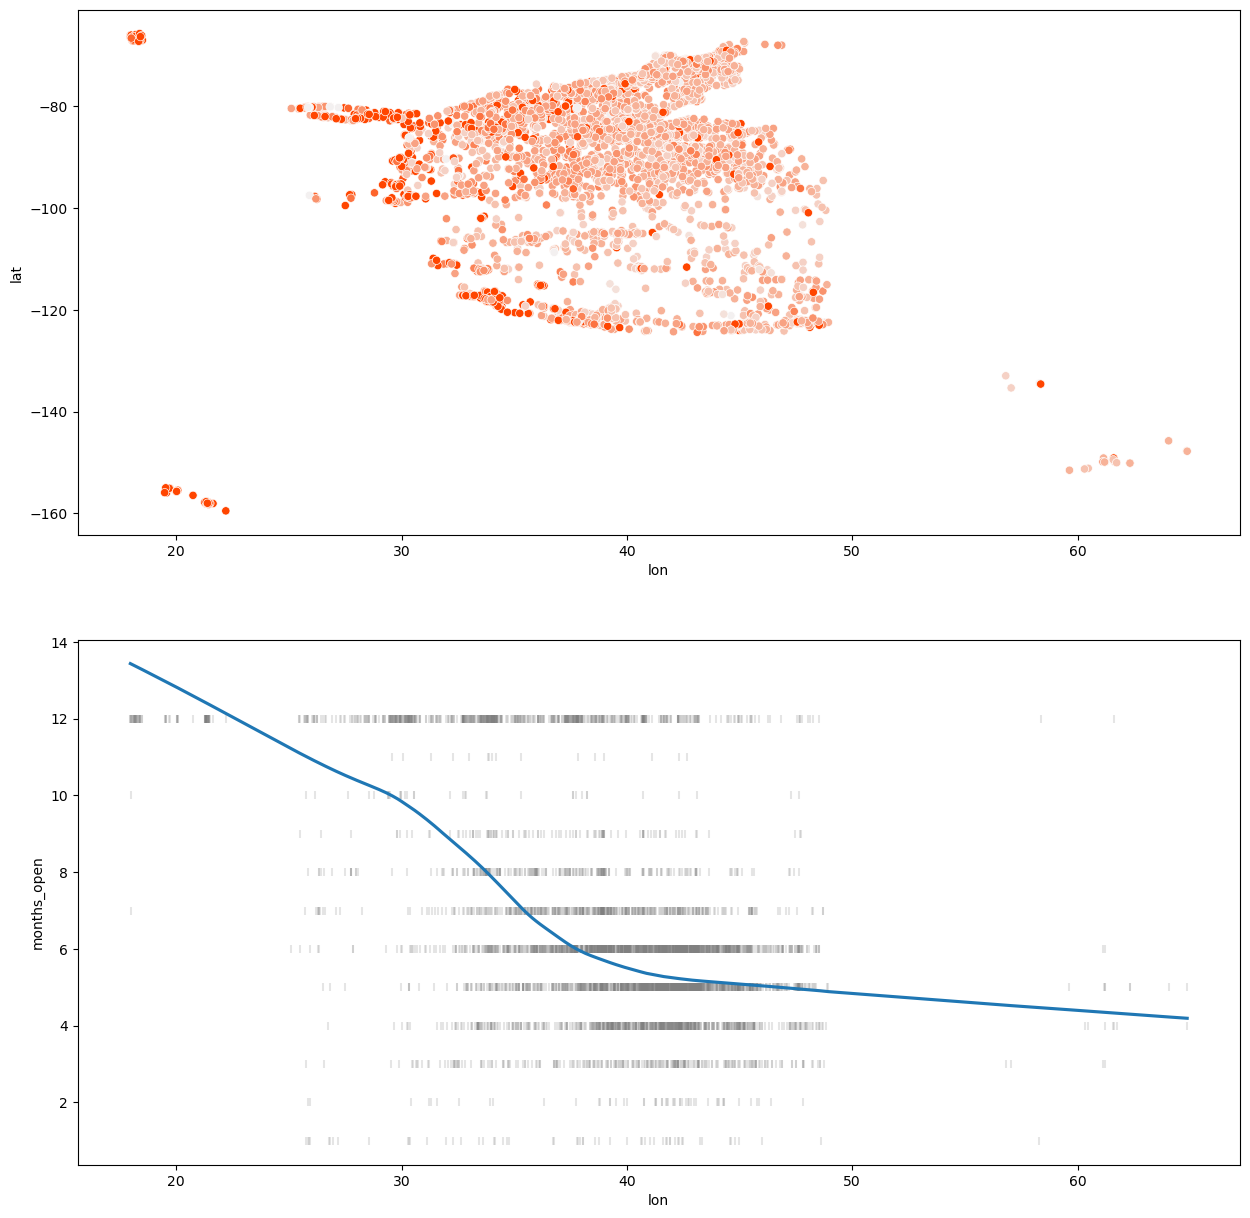

In [93]:
# Setup two stacked plots
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 15))

# Draw location scatter plot on first plot
sns.scatterplot(x="lon", y="lat", hue='months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot(x='lon', y='months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

> There is a broad geographic trends on how long markets stay open in the top map plot. While below, the scatter focuses on patterns in longitude; showing detailed cross-country trends.

### Using a plot as a legend

In [99]:
markets_by_state = pd.read_csv('markets_by_state.csv')
markets_by_state.head()

,Unnamed: 0,state,num_markets,population,people_per_market,log_pop,log_markets,is_selected
0,43,Vermont,68,626562.0,9214.147059,13.348003,4.219508,Vermont
1,7,District of Columbia,44,658893.0,14974.840909,13.398316,3.784190,other
2,48,Wyoming,31,584153.0,18843.645161,13.277918,3.433987,other
3,27,New Hampshire,69,1326813.0,19229.173913,14.098290,4.234107,other
4,24,Montana,52,1023579.0,19684.211538,13.838816,3.951244,other


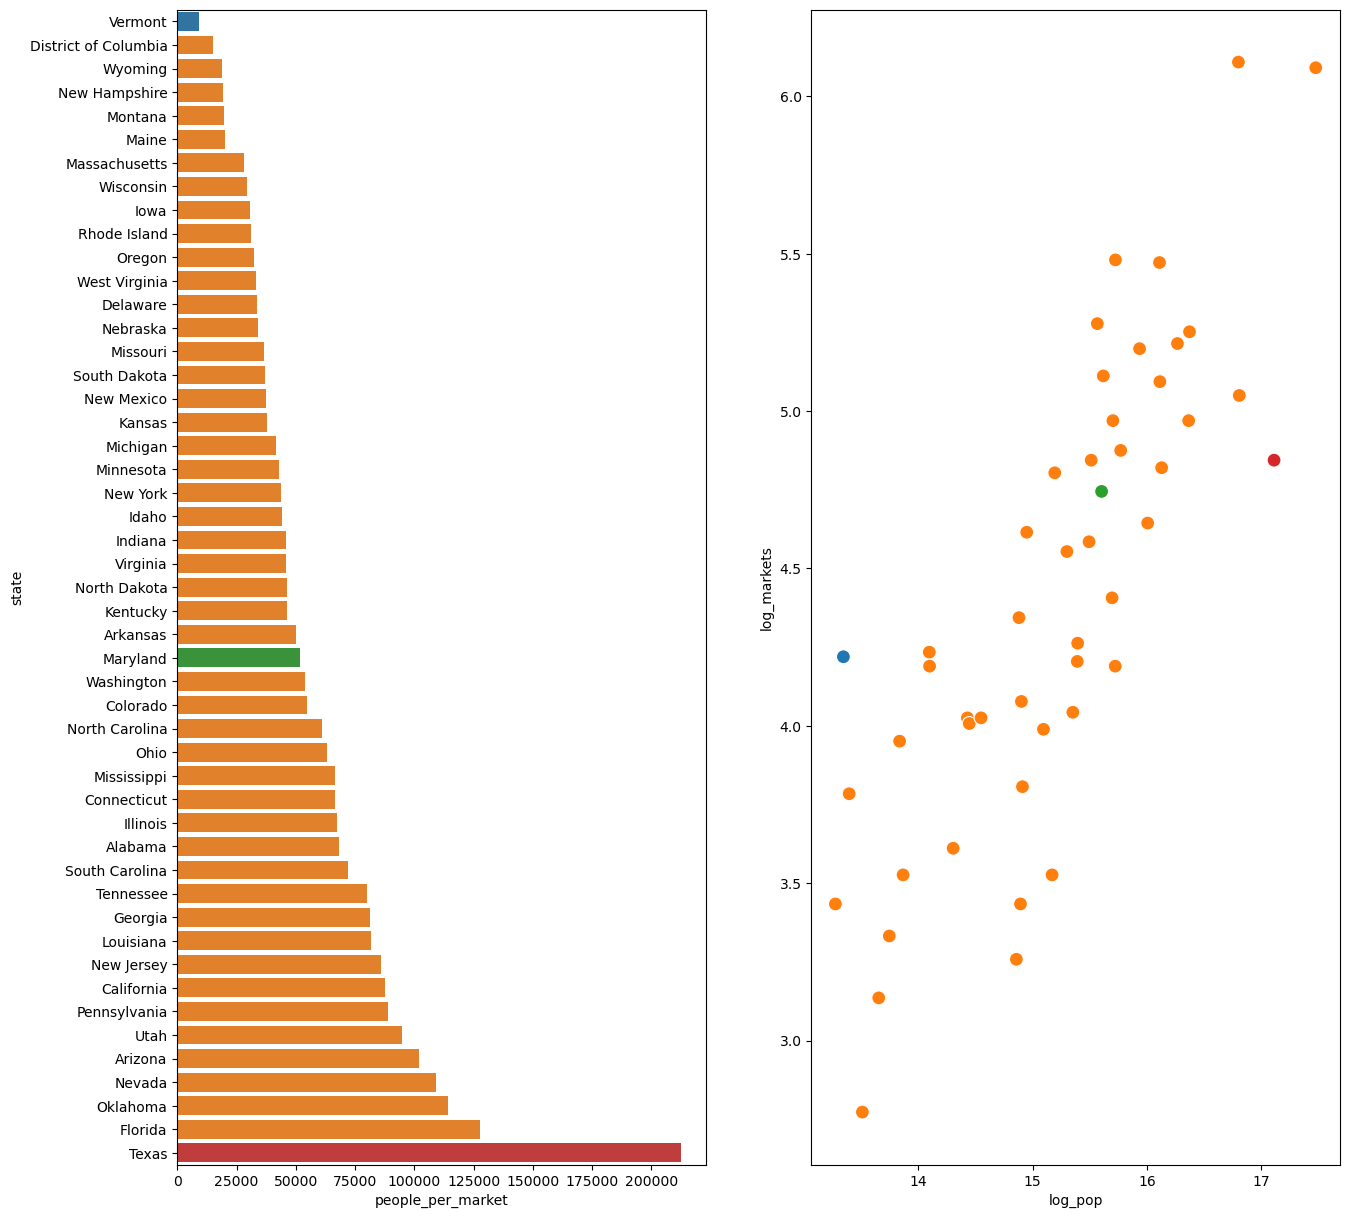

In [101]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot(x= 'people_per_market', y='state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot(x='log_pop', y='log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

## Tweaking your plots
### Cleaning up the background

In [104]:
goods_by_state.head()

,state,good,value,prop_selling
0,Alabama,Bakedgoods,0,0.557143
1,Alabama,Bakedgoods,1,0.442857
2,Alabama,Beans,0,0.957143
3,Alabama,Beans,1,0.042857
4,Alabama,Cheese,0,0.878571


In [110]:
goods = goods_by_state.query("good in ['Cheese','Eggs','Fruits','Maple', 'Poultry', 'Wine']")

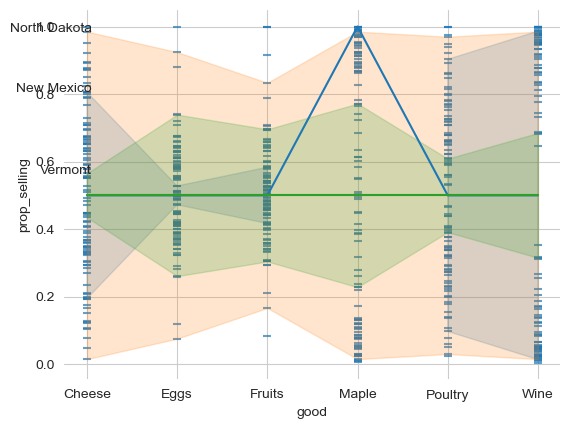

In [114]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter(x='good',y='prop_selling', marker = '_', alpha = 0.7, data = goods)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont'] & good in ['Cheese','Eggs','Fruits','Maple', 'Poultry', 'Wine']")

sns.lineplot(x='good',y='prop_selling', hue='state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop_selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()

### Remixing a plot

In [131]:
markets.months_open.value_counts(dropna=False)

6.0     1373
5.0     1214
12.0     826
4.0      727
7.0      506
3.0      282
8.0      256
9.0      105
1.0       59
2.0       53
10.0      35
11.0      16
Name: months_open, dtype: int64

In [130]:
markets.dropna(subset='months_open',inplace=True)

In [132]:
markets['months_open'] = markets['months_open'].astype('int')

In [139]:
markets['months_open'] = markets['months_open'].astype('object')

In [146]:
markets_by_month = markets.pivot_table(index='state', columns='months_open', values='lat')
markets_by_month

months_open,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
Alabama,-87.285562,-86.009696,-86.664244,-86.651321,-86.522714,-86.764909,-86.648261,-87.100277,NaN,-87.655850,NaN,-86.481032
Alaska,-134.413603,NaN,-141.994130,-149.876808,-149.271347,-149.870628,NaN,NaN,NaN,NaN,NaN,-141.848386
Arizona,-112.542181,NaN,-112.107009,-111.687336,-111.276521,-111.849166,-111.787224,-111.891916,-111.830862,NaN,NaN,-111.171483
Arkansas,-92.318004,NaN,NaN,-92.469031,-91.906859,-92.385406,-93.195573,-93.523146,-93.308333,-93.153806,-94.036315,-93.295537
California,-119.618889,NaN,-121.389938,-121.216552,-121.571062,-121.031050,-121.283571,-120.340246,-120.888252,-120.219017,-119.231043,-119.844542
Colorado,NaN,NaN,-105.701975,-105.646067,-105.652306,-105.099837,-105.746635,-105.203147,NaN,NaN,NaN,-105.690705
Connecticut,NaN,-72.406951,NaN,-72.714527,-72.601724,-72.551579,-72.998701,-72.428673,-73.066490,NaN,NaN,-72.885213
Delaware,-75.315149,-75.148318,-75.334621,-75.418947,-75.528975,-75.508202,-75.527147,-75.216233,-75.596967,NaN,NaN,-75.717303
District of Columbia,NaN,NaN,-76.988105,-77.033575,-76.996431,-77.017686,-77.011479,-77.024654,-77.027817,NaN,NaN,-76.978096


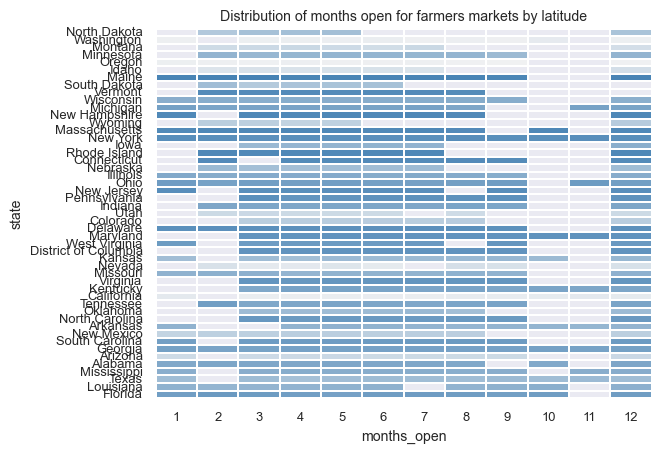

In [148]:
state_by_lat = ['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida']

# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()

### Enhancing legibility

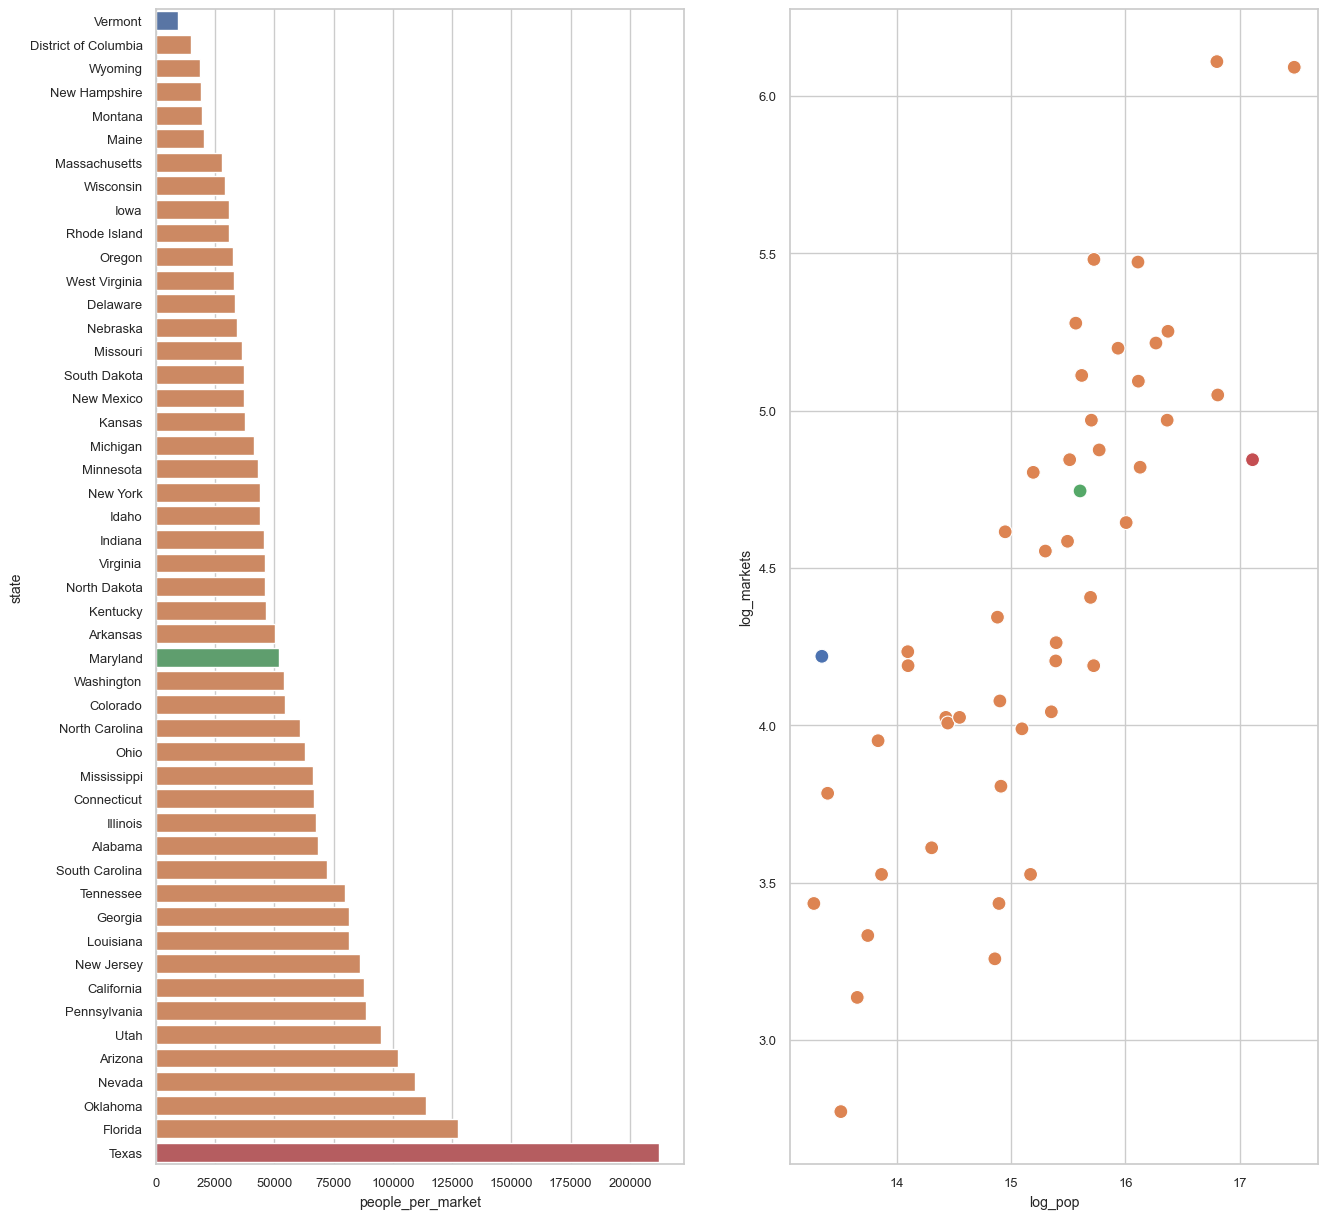

In [179]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot(x= 'people_per_market', y='state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_by_state, ax = ax1)

# Map selected states to point color
sns.scatterplot(x='log_pop', y='log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 